In [1]:
#from google.colab import drive
import numpy as np
#from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import time
#import statistics
import pandas as pd
import sqlite3
import os.path
import seaborn as sns; sns.set()

In [2]:
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#fn = "/content/gdrive/My Drive/chess_data/chessDB.db"
fn = "chessDB.db"

In [3]:
conn = sqlite3.connect(fn)
c = conn.cursor()
#c.execute("SELECT * FROM users;")
#users = c.fetchall()
#print("Number of users: ", len(users))

In [116]:
user_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id GROUP BY users.uid;", conn)

In [117]:
user_date_df.head(20)

,uid,min(user_events.date)
0,12435050,1992-02-02
1,12435066,1991-11-24
2,12435088,2017-05-20
3,12435092,1994-11-20
4,12435105,1992-09-12
5,12435108,1999-08-18
6,12435118,1993-02-23
7,12435133,1991-11-10
8,12435144,1995-07-15
9,12435145,2008-04-26


In [118]:
year_count = user_date_df.groupby('min(user_events.date)').count()

In [119]:
year_count['cumsum'] = year_count['uid'].cumsum()

# Number of players who register every day

In [120]:
year_count.index = pd.to_datetime(year_count.index)

In [121]:
year_count[-100:]

,uid,cumsum
min(user_events.date),,
2018-03-10,1,290301
2018-03-29,1,290302
2018-03-30,1,290303
2018-03-31,1,290304
2018-04-05,1,290305
2018-04-07,1,290306
2018-04-08,1,290307
2018-04-10,1,290308
2018-04-13,1,290309


Text(0, 0.5, 'Number of chess players')

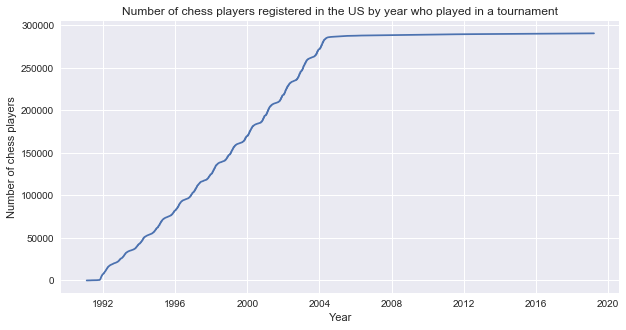

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(year_count.index, year_count['cumsum'].values)
plt.title("Number of chess players registered in the US by year who played in a tournament")
plt.xlabel("Year")
plt.ylabel("Number of chess players")

Slope from 1992 to 2004 and 2004 to 2019. The graph looks a bit suspect: is this real or some inconsistencies on my end or the websites/database end. It will have to do for now, because the answer may take some time. I may investigate more later.

In [138]:
year_count.index[110], year_count.index[4500]

(Timestamp('1992-01-04 00:00:00'), Timestamp('2004-04-02 00:00:00'))

In [141]:
len(year_count)

6530

In [140]:
slope1 = (year_count['cumsum'].values[4500] - year_count['cumsum'].values[110]) / (4500 - 110)
slope1

62.515034168564924

In [142]:
slope2 = (year_count['cumsum'].values[6529] - year_count['cumsum'].values[4500]) / (6529 - 4500)
slope2

3.9310004928536224

From 1992 to 2004, we see about 63 people new people registering and playing in a tournament every year. This has droped significantly down to 4 from 2004 - present

# Average rating and standard deviation by year

In [17]:
ratings_df = pd.read_sql_query("SELECT date, user_events.reg_after, users.uid FROM users INNER JOIN user_events ON users.uid = user_events.user_id;", conn)

In [18]:
ratings_df.head()

,date,reg_after,uid
0,1996-08-25,1385 (P5),12683802
1,1994-12-10,735 (P8),12632612
2,1994-11-06,711 (P4),12632612
3,2001-02-10,576 (P5),12831758
4,1993-04-15,None,12582004


In [19]:
ratings_date_df = pd.DataFrame()

Rows are dates (one date column), columns is the rating for each uid (300k uid columns)

In [20]:
dates = list(sorted(set(ratings_df['date'])))

In [21]:
len(dates)

10057

In [22]:
dates[0], dates[-2]

('1991-01-28', '2019-04-09')

In [23]:
ratings_date_df['dates'] = dates

In [24]:
ratings_date_df.head()

,dates
0,1991-01-28
1,1991-01-31
2,1991-02-18
3,1991-02-26
4,1991-03-17


In [25]:
len(ratings_df)

3283074

Let's just keep track of rating by year, and the latest rating for that year

In [26]:
uid_date_d = {}
start = time.time()
for index, row in ratings_df.iterrows():
    if index % 100000 == 0:
        print(index)
    if not row.uid in uid_date_d.keys():
        uid_date_d[row.uid] = {}
    year = row.date[:4]
    #uid_date_d[row.uid][row.date] = row.reg_after
    # get rid of provisional part
    uid_date_d[row.uid][year] = int(row.reg_after.split(" ")[0]) if row.reg_after else None
end = time.time()
print(end - start, " seconds")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
950.0583763122559  seconds


In [36]:
len(list(uid_date_d.keys()))

290434

In [37]:
uid_date_d[12683802]

{'1996': 1385,
 '1991': 'NA',
 '1992': 'NA',
 '1993': 'NA',
 '1994': 'NA',
 '1995': 'NA',
 '1997': 1385,
 '1998': 1385,
 '1999': 1385,
 '2000': 1385,
 '2001': 1385,
 '2002': 1385,
 '2003': 1385,
 '2004': 1385,
 '2005': 1385,
 '2006': 1385,
 '2007': 1385,
 '2008': 1385,
 '2009': 1385,
 '2010': 1385,
 '2011': 1385,
 '2012': 1385,
 '2013': 1385,
 '2014': 1385,
 '2015': 1385,
 '2016': 1385,
 '2017': 1385,
 '2018': 1385,
 '2019': 1385}

In [38]:
#uid_date_d[12683802]['1996'].split(" ")[0]
int("1385")

1385

In [39]:
"1385".split(" ")[0]

'1385'

In [40]:
uid_set = set(ratings_df['uid'])

In [41]:
uids = list(uid_set)

In [42]:
len(uids)

290434

In [43]:
# years: 1991 - 2019
years = [str(x) for x in range(1991, 2020)]
years

['1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [44]:
for num, uid in enumerate(uids):
    for index, year in enumerate(years):
        if year not in uid_date_d[uid]:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"
        elif uid_date_d[uid][year] == None:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"
import pickle

In [45]:
pickle.dump(uid_date_d, open( "uid_date_d.pickle", "wb" ))

In [46]:
df = pd.DataFrame(index=years)
start = time.time()
for num, uid in enumerate(uids):
    if num % 10000 == 0:
        print(num)
    u = []
    for year in years:
        u.append(uid_date_d[uid][year])
    df[uid] = u
end = time.time()
print(end - start, "seconds")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
6132.803323030472 seconds


In [47]:
df.mean(axis=1)

1991    1469.460505
1992    1469.567591
1993    1476.286349
1994    1479.513102
1995    1478.230063
1996    1475.899347
1997    1471.365812
1998    1465.221455
1999    1457.432788
2000    1450.476871
2001    1443.122789
2002    1440.520764
2003    1436.994135
2004    1437.610538
2005    1445.361082
2006    1451.171223
2007    1455.811560
2008    1460.367420
2009    1464.976540
2010    1469.812222
2011    1473.800965
2012    1478.176615
2013    1481.488033
2014    1484.912118
2015    1487.496926
2016    1489.286444
2017    1491.377069
2018    1492.500993
2019    1494.856873
dtype: float64

In [48]:
df_aggs = df.copy(deep=True)
df_aggs['mean'] = df.mean(axis=1)
df_aggs['std'] = df.std(axis=1)

In [49]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911,mean,std
1991,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,1469.460505,404.693575
1992,1451,2356,NA,1125,1535,1203,1237,1522,882,792,...,417,619,1528,1377,1765,1056,870,607,1469.567591,401.143367
1993,1434,2259,1213,1125,1535,1203,1237,1574,882,792,...,545,619,1501,1291,1355,756,1017,607,1476.286349,399.984928
1994,1485,2259,1125,1125,1535,1203,1237,1574,882,792,...,618,619,1477,1646,1355,756,1017,607,1479.513102,400.431339
1995,1485,2259,1125,1192,1535,1203,1237,1574,882,792,...,618,619,1481,1760,1355,781,1017,607,1478.230063,401.704975


Text(0, 0.5, 'Average rating')

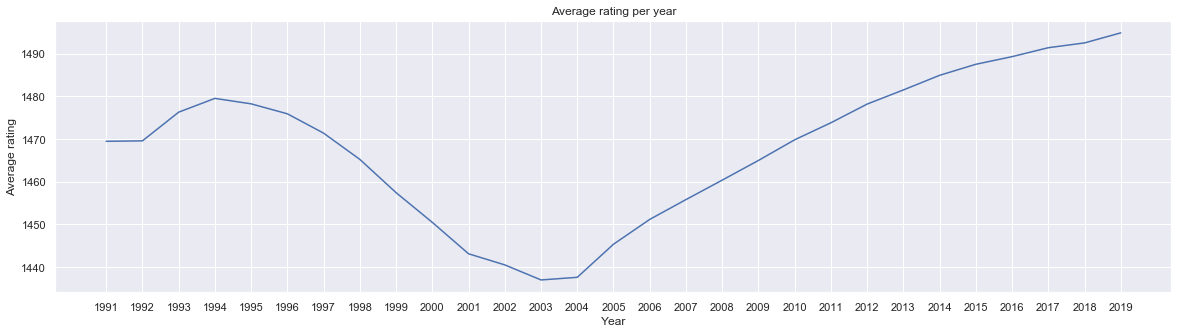

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(df_aggs.index, df_aggs['mean'].values)
plt.title("Average rating per year")
plt.xlabel("Year")
plt.ylabel("Average rating")

The rating average appears to peak around 1994, dip down near 2003 and has been on the increase ever since.

In [143]:
df_aggs.to_csv("df_aggs.csv")

In [96]:
df.to_pickle("df_aggs.pkl")

In [4]:
df_aggs = pd.read_csv("df_aggs.csv", index_col=0)

In [6]:
df_original = df_aggs.copy(deep=True)

In [12]:
df_aggs = df_aggs.iloc[:, 0:-2]

In [16]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582902,12582903,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,1451.0,2356.0,NaN,1125.0,1535.0,1203.0,1237.0,1522.0,882.0,792.0,...,356.0,843.0,417.0,619.0,1528.0,1377.0,1765.0,1056.0,870.0,607.0
1993,1434.0,2259.0,1213.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,545.0,619.0,1501.0,1291.0,1355.0,756.0,1017.0,607.0
1994,1485.0,2259.0,1125.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,618.0,619.0,1477.0,1646.0,1355.0,756.0,1017.0,607.0
1995,1485.0,2259.0,1125.0,1192.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,618.0,619.0,1481.0,1760.0,1355.0,781.0,1017.0,607.0


In [51]:
df_aggs.mean(axis=1)

1991    1469.359799
1992    1469.466538
1993    1476.184552
1994    1479.411042
1995    1478.128245
1996    1475.797841
1997    1471.264858
1998    1465.121150
1999    1457.333203
2000    1450.377840
2001    1443.024476
2002    1440.422686
2003    1436.896367
2004    1437.512641
2005    1445.262085
2006    1451.071570
2007    1455.711430
2008    1460.266887
2009    1464.875648
2010    1469.711073
2011    1473.699558
2012    1478.074895
2013    1481.386126
2014    1484.810043
2015    1487.394707
2016    1489.184080
2017    1491.274451
2018    1492.398193
2019    1494.753660
dtype: float64

# Rating by gender per year

In [70]:
female_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'F';", conn)

In [71]:
len(female_df)

46942

In [72]:
male_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'M';", conn)

In [73]:
len(male_df)

401926

In [74]:
unknown_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'U';", conn)

In [75]:
len(unknown_df)

39718

In [76]:
users_df = pd.read_sql_query("SELECT users.uid FROM users;", conn)

In [77]:
len(users_df), len(df_aggs.columns)

(488586, 290439)

In [78]:
female_uids = female_df['uid']
male_uids = male_df['uid']
unknown_uids = unknown_df['uid']
#female_uids = [str(x) for x in female_uids]
#male_uids = [str(x) for x in male_uids]
#unknown_uids = [str(x) for x in unknown_uids]

In [79]:
female_df = df_aggs[df_aggs.columns.intersection(female_uids)]
male_df = df_aggs[df_aggs.columns.intersection(male_uids)]
unknown_df = df_aggs[df_aggs.columns.intersection(unknown_uids)]

In [80]:
len(female_df.columns) + len(male_df.columns) + len(unknown_df.columns), len(df_aggs.columns)

(290434, 290439)

In [81]:
male_df_aggs = male_df.copy(deep=True)
male_df_aggs['mean'] = male_df.mean(axis=1)
male_df_aggs['std'] = male_df.std(axis=1)
male_df_aggs['median'] = male_df.median(axis=1)
male_df_aggs['max'] = male_df.max(axis=1)
male_df_aggs['min'] = male_df.min(axis=1)

In [82]:
female_df_aggs = female_df.copy(deep=True)
female_df_aggs['mean'] = female_df.mean(axis=1)
female_df_aggs['std'] = female_df.std(axis=1)
female_df_aggs['median'] = female_df.median(axis=1)
female_df_aggs['max'] = female_df.max(axis=1)
female_df_aggs['min'] = female_df.min(axis=1)

In [83]:
unknown_df_aggs = unknown_df.copy(deep=True)
unknown_df_aggs['mean'] = unknown_df.mean(axis=1)
unknown_df_aggs['std'] = unknown_df.std(axis=1)
unknown_df_aggs['median'] = unknown_df.median(axis=1)
unknown_df_aggs['max'] = unknown_df.max(axis=1)
unknown_df_aggs['min'] = unknown_df.min(axis=1)

In [66]:
df_aggs['median'] = df_aggs.median(axis=1)
df_aggs['max'] = df_aggs.max(axis=1)
df_aggs['min'] = df_aggs.min(axis=1)

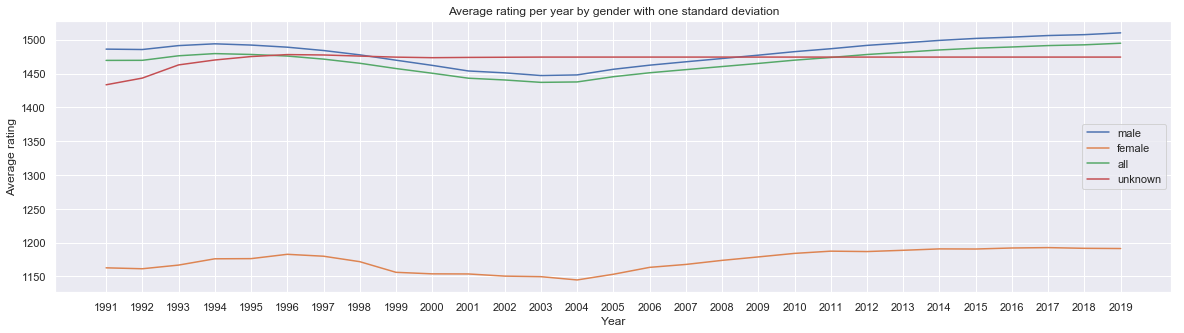

In [92]:
plt.figure(figsize=(20, 5))
plt.plot(male_df_aggs.index, male_df_aggs['mean'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['mean'].values, label="female")
plt.plot(df_aggs.index, df_aggs['mean'].values, label="all")
plt.plot(df_aggs.index, unknown_df_aggs['mean'].values, label="unknown")
plt.title("Average rating per year by gender with one standard deviation")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.legend()

There is a significant difference between the average male and female chess ratings and the difference, about 250 remains relatively consistent over this timeframe. The average for males is about 1450 and for females is about 1200.

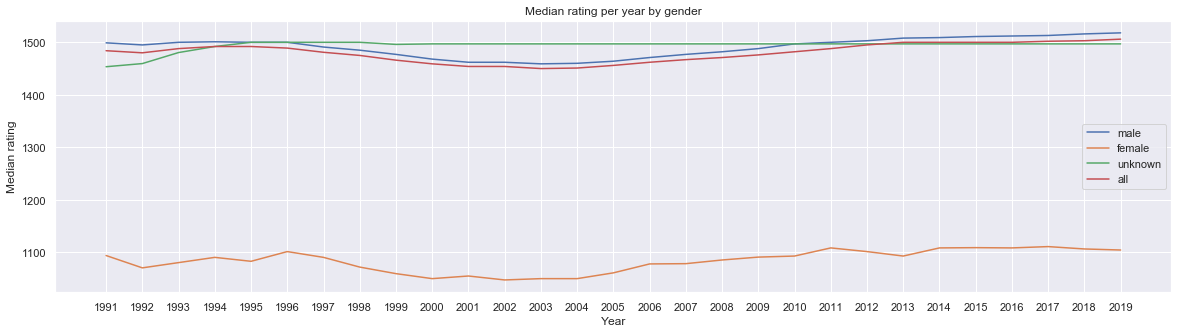

In [95]:
plt.figure(figsize=(20, 5))
plt.plot(male_df_aggs.index, male_df_aggs['median'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['median'].values, label="female")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['median'].values, label="unknown")
plt.plot(df_aggs.index, df_aggs['median'].values, label="all")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Median rating per year by gender")
plt.xlabel("Year")
plt.ylabel("Median rating")
plt.legend()

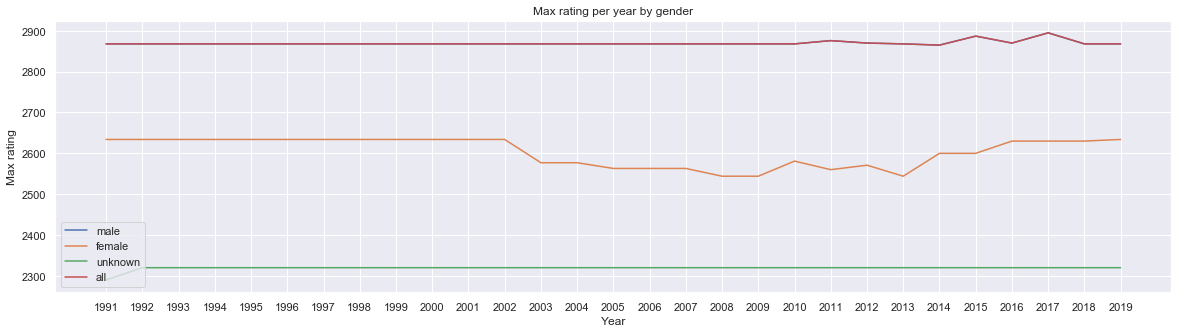

In [94]:
plt.figure(figsize=(20, 5))
plt.plot(male_df_aggs.index, male_df_aggs['max'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['max'].values, label="female")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['max'].values, label="unknown")
plt.plot(df_aggs.index, df_aggs['max'].values, label="all")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Max rating per year by gender")
plt.xlabel("Year")
plt.ylabel("Max rating")
plt.legend()

Now we can understand why the average and median rating has not been going up because the max hasn't either. We should also consider that rating is similar to a log scale.

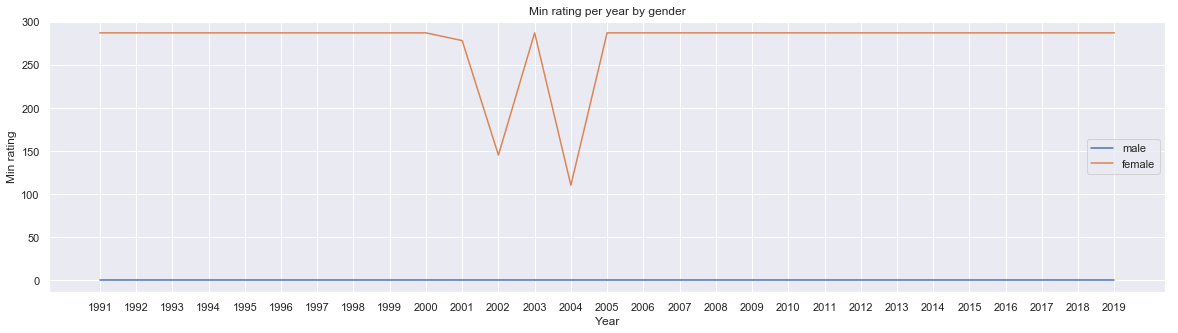

In [87]:
plt.figure(figsize=(20, 5))
plt.plot(male_df_aggs.index, male_df_aggs['min'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['min'].values, label="female")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Min rating per year by gender")
plt.xlabel("Year")
plt.ylabel("Min rating")
plt.legend()

# Looking at the number of tournaments per state

In [8]:
events_df = pd.read_sql_query("SELECT state, COUNT(*) FROM events_dim GROUP BY state ORDER BY COUNT(*) DESC LIMIT 100;", conn)

In [9]:
events_df

,state,COUNT(*)
0,NY,24598
1,CA,20329
2,TX,16094
3,PA,10730
4,NJ,8560
5,OH,8320
6,AZ,7180
7,IL,6867
8,MA,6591
9,FL,6299


Looks like I messed up getting the states

In [10]:
events_df = pd.read_sql_query("SELECT * FROM events_dim;", conn)

In [21]:
len(events_df)

202409

In [19]:
states = []
for s in events_df['state']:
    adding = s.split()[-1][-2:]
    if len(s) == 2:
        states.append(s)
#     if adding == "-3":
#         print(s)
#     states.append(adding)

In [20]:
len(states)

199129

In [23]:
(len(events_df) - len(states)) / len(events_df)

0.016204813027088715

In [29]:
events_df.head()

,event_id,date,state,event_name
0,199101282140,1991-01-28,CA,MISSION OAKS WINTER ACTION
1,199101310270,1991-01-31,MA,JANUARY TOURNAMENT
2,199102182150,1991-02-18,CA,FEB CARMICHAEL TOUR
3,199102260280,1991-02-26,MA,FRAMINGHAM FEB 4 SEC SWISS
4,199103170680,1991-03-17,NY,H.C.E.S. #40


In [30]:
# events_df_cleaned = pd.DataFrame()
# events_df_cleaned['event_id'] = events_df['event_id']
# events_df_cleaned['date'] = events_df['date']
# events_df_cleaned['event_name'] = events_df['event_name']
# events_df_cleaned['state'] = events_df['state']

In [38]:
events_df_cleaned = pd.read_sql_query("SELECT * FROM events_dim WHERE length(state) = 2;", conn)

In [41]:
len(events_df_cleaned) == len(states)

True

Got the state incorrectly about 1.6% of the time, let's get rid of the incorrect ones for now, but maybe will rewrite the scraping during the summer. This happened because there is no set format for entering in the state of a tournament in the database unfortunately.

In [42]:
events_df_cleaned.to_sql('events_dim_cleaned', con=conn, if_exists='append', index=False)

# Close Connection

In [0]:
conn.close()